<H1>SVM - Машины опорных векторов</H1>

<h2>Создаём модельные данные для двух классов</h2>

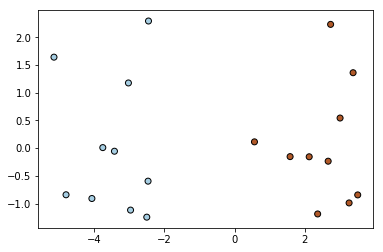

In [57]:
import numpy as np                   # работа с массивами
import matplotlib.pyplot  as plt     # построение графиков
import matplotlib.patches as patches # рисование геометрических фигур
from   sklearn import svm            # машины опорных векторов

num = 10;                            # число примеров каждого класса
np.random.seed(2)                    # фиксируем случ.последовательность

y = np.append(np.zeros(num), np.ones(num)) # получаем: [0,0,..,1,1,..]
x = np.random.randn(2*num, 2)        # массив нормальных сл.чисел 2*num x 2
x[:num, 0] -= 3;  x[num:, 0] += 3;   # первый двигаем влево, второй вправо

plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')
plt.show()

<h2>Создаём классификатор и обучаем его</h2>

In [58]:
clf = svm.SVC(kernel='linear')          # задаём классификатор
clf.fit(x, y)                           # обучаем его 

print('ok:', clf.score(x,y) )           # точность (на обучающих данных)
print(clf.predict([ [-1, 0], [1, 0] ])) # делаем предсказание для 2-х точек
print(clf)                              # выводим параметры классификатора

ok: 1.0
[ 0.  1.]
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


<h2>Карта расстояний</h2>

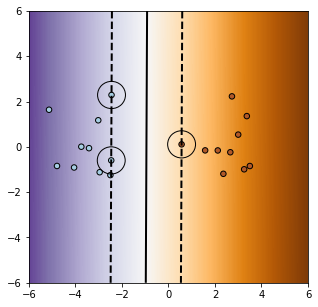

In [59]:
# Карта расстояний от плоскости, уровни линий, данные и опорные векторы
def plot(clf, x, y, xMin, xMax, levels=[0], showVec=False): 
    # сетка точек 501 x 501 в интервале x1,x2=[xMin,xMax]
    x1,x2 = np.meshgrid(np.linspace(xMin,xMax,501),np.linspace(xMin,xMax,501))
    grid  = np.c_[x1.ravel(), x2.ravel()]
    
    # Вычисляем в точках сетки расстояния до разделяющей плоскости:
    yp = clf.decision_function(grid).reshape(x1.shape)
    vMax = np.max(yp);                        # максимальное расстояние
    
    fig,ax = plt.subplots(figsize=(5, 5));    # размеры картинки (квадрат!)
    plt.axis([xMin, xMax, xMin, xMax])        # диапазон изменения осей

    plt.imshow(yp, interpolation='nearest',   # цвет. карту для 2D массива yp
                   extent=(x1.min(), x1.max(), x2.min(), x2.max()), 
                   aspect='auto', origin='lower', 
                   vmin=-vMax, vmax=vMax, cmap=plt.cm.PuOr_r)

    plt.contour(x1,x2, yp, # линии yp = levels                
                levels=levels, linewidths=2, colors=['k', 'k', 'k'],   
                linestyles= ['--', '-', '--'] if len(levels)==3 else ['-'])
    plt.scatter(x[:,0], x[:,1], s=30, c=y, cmap=plt.cm.Paired,edgecolors='k')

    if showVec:                                # окружностями-опорные векторы
        vecs = clf.support_vectors_            # получаем массив векторов
        for v in vecs:                         
            ax.add_patch( patches.Circle(v, (xMax-xMin)*0.05, fill=False ) )
        
    plt.show()                                 # собственно выводим рисунок
    
plot(clf,x,y, -6, 6,  [-1,0,1], True)          # запускаем функцию

<h2>Выбор параметра C</h2>

ok: 0.970, n_vec [10 10]


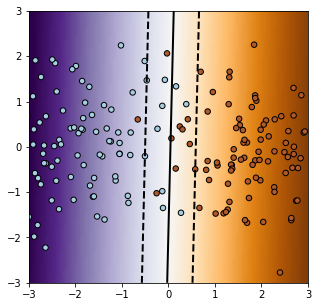

In [61]:
np.random.seed(0)                       
num = 100;                              # больше примеров каждого класса
y = np.append(np.zeros(num), np.ones(num)); 
x = np.random.randn(2*num, 2);     
x[:num, 0] -= 2; x[num:, 0] += 2;       # слабо сдвинем (классы перекроются)

clf = svm.SVC(kernel='linear', C=1)     # (!) C= 1, 0.1, 10
clf.fit(x, y)                           # обучаемся 

print('ok: %.3f,'% clf.score(x,y), 'n_vec', clf.n_support_) 
plot(clf,x,y, -3, 3,  [-1,0,1])         # (!) поставь True на С=1

<h2>Ядра:</h2>
<div style="float:left">
<table>
<tr>
<td style="width:3em">
<b style="color:blue">linear</b>: </td>
<td style="width:12em">$\langle x,x'\rangle$,</td></tr>
<tr>
<td><b style="color:blue">poly</b>: </td>
<td>$\bigr(\,r \,+\, \gamma\, \langle x,x'\rangle\,\bigr)^d$,</td></tr>
<tr>
<td><b style="color:blue">rbf</b>:</td>
<td> $\exp(-\gamma \,(x-x')^2)$,</td></tr>
<tr>
<td><b style="color:blue">sigmoid</b>: </td>
<td>$\tanh(\, r\, + \,\gamma\, \langle x,x'\rangle \,)$</td></tr>
</table>    
</div>
<div style="float:left; margin-left:20px">
Параметры:<br> 
$C$ - чувствительность к шуму<br>
$\gamma=$ gamma, $d=$ degree, $r=$ coef0.<br><br> 
По умолчанию:<br> kernel='rbf', coef0=0.0, degree=3, gamma=1/число признаков
</div>
<div style="clear:both"></div>

ok: 1.000, n_vec [ 8 29]


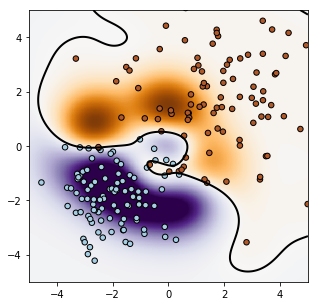

In [63]:
np.random.seed(0)                       # генерим пересекающиеся классы
num = 100;                              # примеров каждого класса
x = np.append(np.random.randn(num,2)-2, 2*np.random.randn(num,2)+2, axis=0);
y = np.append(np.zeros(num), np.ones(num)); 

# (!) (C,gamma)=(10000,-), (1,0.1), (10000,0.01) <- векторы,  [-1,0,1]
clf = svm.SVC(kernel='rbf', C=10000)        

# (!) C=1000,   [-1,0,1]
#clf = svm.SVC(kernel='poly', C=1000, coef0=1, degree=2, gamma=1)

clf.fit(x, y)                           # обучаемся 
print('ok: %.3f,'% clf.score(x,y), 'n_vec', clf.n_support_) 
plot(clf, x,y, -5, 5, [0])

<h2>Дырка без шума</h2>

ok: 0.984, n_vec [78 76]


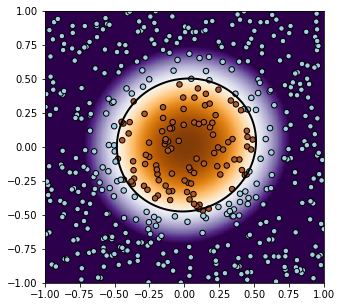

In [65]:
np.random.seed(0)
x = 2 * np.random.rand(500, 2) - 1
y = x[:, 0]**2 + x[:, 1]**2 < 0.25

# (!) C = 1, 10000, 1000000 <- число векторов, True; 
clf = svm.SVC(kernel='rbf', C=1)
# (!)
#clf = svm.SVC(kernel='poly', coef0=0, degree=2, C=10000)

clf.fit(x, y)                           # обучаемся 
print('ok: %.3f,'% clf.score(x,y), 'n_vec', clf.n_support_) 
plot(clf, x,y, -1, 1, [0])

<h2>Дырка с шумом</h2>

ok: 0.975, n_vec [22 27]


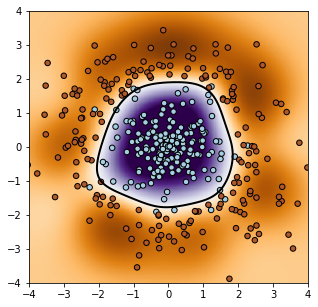

In [66]:
np.random.seed(0)
num = 200;                                        # примеров каждого класса
r   = np.append(np.abs(np.random.randn(num)),     # радиусы
                np.abs(np.random.randn(num))+2);
phi = (2*np.pi)*np.random.rand(2*num)             # углы

x = np.c_[r*np.cos(phi), r*np.sin(phi)]           # полярные коорд.
y = np.append(np.zeros(num), np.ones(num)); 

# (!) C=10,10000;
clf = svm.SVC(C=10)
# (!) эллипс, число векторов
#clf = svm.SVC(kernel='poly', coef0=0, degree=2, C=10)

clf.fit(x, y)                                     # обучаемся 
print('ok: %.3f,'% clf.score(x,y), 'n_vec', clf.n_support_) 
plot(clf, x,y, -4, 4, [0])

<h2>Две дырки без шума</h2>

Разделяющая поверхность в SVM имеет вид: $\omega_0 + \sum \lambda_i Y_i \, K(\mathbf{x}_i\mathbf{x}) = 0$<br>
Поверхность из двух сфер можно описать уравнением $[(\mathbf{x}-\mathbf{a})^2 - r^2_a][(\mathbf{x}-\mathbf{b})^2 - r^2_b] \sim x^4$.<br>
Поэтому минимальное полиномиальное ядро должно иметь degree=4:

ok: 1.000, n_vec [256  45]


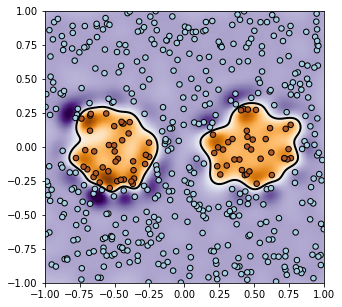

In [67]:
np.random.seed(0)
x = 2 * np.random.rand(500, 2) - 1
y = np.logical_or((x[:, 0] - 0.5)**2 + x[:, 1]**2 < 0.1, 
                  (x[:, 0] + 0.5)**2 + x[:, 1]**2 < 0.1)

# (!) C=10, 100, 1000, gamma=100
clf = svm.SVC(C=10, gamma=100)
# (!) degree 4,3,5; [теория] C=10, degree=4
#clf = svm.SVC(kernel='poly', coef0=1, degree=4, C=1000)

clf.fit(x, y)                           # обучаемся 
print('ok: %.3f,'% clf.score(x,y), 'n_vec', clf.n_support_) 
plot(clf, x,y, -1, 1, [0])

<h2>Разделяющее или: XOR</h2>

ok: 1.000, n_vec [4 5]


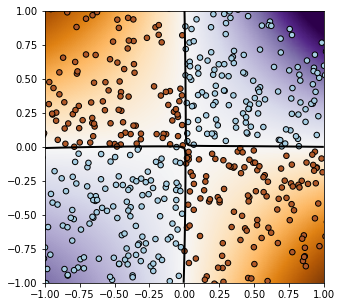

In [56]:
np.random.seed(0)
x = np.random.randn(1000, 2)                        
y = np.logical_xor(x[:, 0] > 0, x[:, 1] > 0)

clf = svm.SVC(kernel='poly', C=10000, coef0=1, gamma=10, degree=3) 
clf.fit(x, y)
print('ok: %.3f,'% clf.score(x,y), 'n_vec', clf.n_support_) 
plot(clf, x,y, -1, 1, [0])

<h2>Подбор параметров</h2>

In [55]:
import pandas as pd                                 # работа с таблицами
from sklearn.model_selection import GridSearchCV

np.random.seed(0)
x = np.random.randn(1000, 2)                        
y = np.logical_xor(x[:, 0] > 0, x[:, 1] > 0)

svc = svm.SVC(kernel='poly', degree=2) # на degree=3 SVM XOR подвисает!
parameters = {  'gamma':[10, 100, 500], 'C':[1, 10, 100], 'coef0':[0,1] }

grid_search = GridSearchCV(svc, parameters, cv=5, 
                           verbose=1, return_train_score=True)
grid_search.fit(x, y)

print("Best score: %0.3f" % grid_search.best_score_)
print("Best parameters set:")
best_parameters=grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

df = pd.DataFrame(grid_search.cv_results_)
df.sort_values(by='mean_test_score',ascending=False).iloc[:,2:8]

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best score: 0.998
Best parameters set:
	C: 10
	coef0: 1
	gamma: 10


[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:    2.0s finished


,mean_test_score,mean_train_score,param_C,param_coef0,param_gamma,params
9,0.998,0.997500,10,1,10,"{'C': 10, 'coef0': 1, 'gamma': 10}"
13,0.997,0.999750,100,0,100,"{'C': 100, 'coef0': 0, 'gamma': 100}"
2,0.997,0.999750,1,0,500,"{'C': 1, 'coef0': 0, 'gamma': 500}"
4,0.997,0.998251,1,1,100,"{'C': 1, 'coef0': 1, 'gamma': 100}"
5,0.997,0.999250,1,1,500,"{'C': 1, 'coef0': 1, 'gamma': 500}"
7,0.997,0.999500,10,0,100,"{'C': 10, 'coef0': 0, 'gamma': 100}"
10,0.997,0.999250,10,1,100,"{'C': 10, 'coef0': 1, 'gamma': 100}"
16,0.996,0.999500,100,1,100,"{'C': 100, 'coef0': 1, 'gamma': 100}"
15,0.996,0.998750,100,1,10,"{'C': 100, 'coef0': 1, 'gamma': 10}"
1,0.996,0.999000,1,0,100,"{'C': 1, 'coef0': 0, 'gamma': 100}"
